In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
train = np.loadtxt('train.csv', delimiter=',', skiprows = 1, usecols = list(range(8, 218)))
train = np.transpose(train)
win = np.loadtxt('train.csv', dtype = 'str_', delimiter=',', skiprows = 1, usecols = 2)
win = np.array([1 if element == '"Yes"' else 0 for element in win])
m = win.shape[0]
win = np.reshape(win, (1,m))

test = np.loadtxt('test.csv', delimiter=',', skiprows = 1, usecols = list(range(7, 217)))
test = np.transpose(test)

In [88]:
train.shape

(210, 9520)

In [89]:
win.shape

(1, 9520)

train accuracy: 65.85084033613445 %


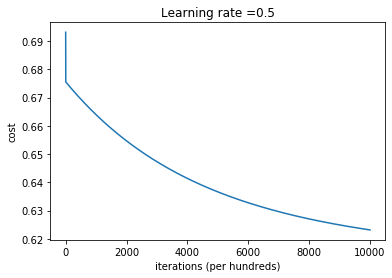

In [114]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b


class Propagate:
    def __init__(self, sigmoid):
        self.sigmoid = sigmoid

    def __call__(self, w, b, X, Y): # X = train, Y = win
        m = X.shape[1]
        # FORWARD PROPAGATION (FROM X TO COST)
        A = self.sigmoid(np.dot(w.T, X) + b)  # compute activation
        cost = -1 / m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost
        # BACKWARD PROPAGATION (TO FIND GRAD)
        dw = 1 / m * np.dot(X, (A - Y).T)
        db = 1 / m * np.sum(A - Y)
        cost = np.squeeze(cost)
        grads = {"dw": dw, "db": db}
        return grads, cost


class Optimize:
    def __init__(self, propagate):
        self.propagate = propagate

    def __call__(self, w, b, X, Y, num_iterations, learning_rate, print_cost=False):
        costs = []

        for i in range(num_iterations):
            grads, cost = self.propagate(w, b, X, Y)
            dw = grads["dw"]
            db = grads["db"]
            w = w - dw * learning_rate
            b = b - db * learning_rate
            if i % 100 == 0:
                costs.append(cost)

        params = {"w": w,
                  "b": b}
        grads = {"dw": dw, "db": db}
        return params, grads, costs


def predict(w, b, X):

    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0][i] >= 0.5:
            Y_prediction[0][i] = 1
        else:
            Y_prediction[0][i] = 0
        pass
    assert (Y_prediction.shape == (1, m))
    return Y_prediction


class Model:
    def __init__(self, initialize_with_zeros, optimize, predict, num_iterations=2000, learning_rate=0.5, print_cost=False):
        self.initialize_with_zeros = initialize_with_zeros
        self.optimize = optimize
        self.predict = predict
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.print_cost = print_cost

    def __call__(self, X_train, Y_train, X_test, Y_test):

        # initialize parameters with zeros (≈ 1 line of code)
        w, b = self.initialize_with_zeros(X_train.shape[0])

        # Gradient descent (≈ 1 line of code)
        parameters, grads, costs = self.optimize(w, b, X_train, Y_train, self.num_iterations, self.learning_rate, self.print_cost)

        # Retrieve parameters w and b from dictionary "parameters"
        w = parameters["w"]
        b = parameters["b"]

        # Predict test/train set examples (≈ 2 lines of code)
        Y_prediction_test = self.predict(w, b, X_test)
        Y_prediction_train = self.predict(w, b, X_train)

        # Print train/test Errors
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

        d = {"costs": costs,
             "Y_prediction_test": Y_prediction_test,
             "Y_prediction_train": Y_prediction_train,
             "w": w,
             "b": b,
             "learning_rate": self.learning_rate,
             "num_iterations": self.num_iterations}

        return d


class ModelResult:
    def __init__(self, initialize_with_zeros, optimize, predict, num_iterations=2000, learning_rate=0.5, print_cost=False):
        self.initialize_with_zeros = initialize_with_zeros
        self.optimize = optimize
        self.predict = predict
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.print_cost = print_cost

    def __call__(self, X_train, Y_train, X_test):

        # initialize parameters with zeros (≈ 1 line of code)
        w, b = self.initialize_with_zeros(X_train.shape[0])

        # Gradient descent (≈ 1 line of code)
        parameters, grads, costs = self.optimize(w, b, X_train, Y_train, self.num_iterations, self.learning_rate, self.print_cost)

        # Retrieve parameters w and b from dictionary "parameters"
        w = parameters["w"]
        b = parameters["b"]

        # Predict test/train set examples (≈ 2 lines of code)
        Y_prediction_test = self.predict(w, b, X_test)
        Y_prediction_train = self.predict(w, b, X_train)

        # Print train/test Errors
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))

        d = {"costs": costs,
             "Y_prediction_test": Y_prediction_test,
             "Y_prediction_train": Y_prediction_train,
             "w": w,
             "b": b,
             "learning_rate": self.learning_rate,
             "num_iterations": self.num_iterations}

        return d


In [1]:
train_set_x = train / np.sum(train, axis = 1, keepdims = True)
train_set_y = win
test_set_x = test / np.sum(test, axis = 1, keepdims = True)

propagate = Propagate(sigmoid)
optimize = Optimize(propagate)
model = ModelResult(initialize_with_zeros, optimize, predict, num_iterations=1000000, learning_rate=0.5, print_cost=True)
d = model(train_set_x, train_set_y, test_set_x)


# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

d['Y_prediction_train']

In [165]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y


def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [210, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3
    
    
    
def sigmoid(z):
    x = tf.placeholder(tf.float32, name = 'x')
    sigmoid = tf.sigmoid(x)
    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict = {x: z})    
    return result


def cost(logits, labels): # z and y
    z = tf.placeholder(tf.float32, name = 'z')
    y = tf.placeholder(tf.float32, name = 'y')
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = z,  labels = y)
    
    sess = tf.Session()
    cost = sess.run(cost, feed_dict = {z: logits, y: labels})
    sess.close()
        
    return cost


def one_hot_matrix(labels, C): # c = number of classes, the depth of one hot dimension
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
    """
    C = tf.constant(C, name = 'C')    
    one_hot_matrix = tf.one_hot(labels, C, axis = 0)
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    
    return one_hot


def ones(shape): # create an array of ones of dimension of shape 
    ones = tf.ones(shape)
    sess = tf.Session()
    
    ones = sess.run(ones)
    sess.close()
    
    return ones


trainX = train / np.sum(train, axis = 1, keepdims = True)
trainY = convert_to_one_hot(win, 2)

testX = test / np.sum(test, axis = 1, keepdims = True)

#randomly divide into train and dev sets
devIndex = np.random.choice(range(0,9520), 500, replace = False)
X_dev = np.array([feat[devIndex] for feat in trainX])
Y_dev = np.array([lab[devIndex] for lab in trainY])

X_train = np.array([np.delete(feat, devIndex) for feat in trainX])
Y_train = np.array([np.delete(feat, devIndex) for feat in trainY])


print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_dev.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_dev.shape))
print ("Y_test shape: " + str(Y_dev.shape))



number of training examples = 9020
number of test examples = 500
X_train shape: (210, 9020)
Y_train shape: (2, 9020)
X_test shape: (210, 500)
Y_test shape: (2, 500)


In [160]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, shape = (n_x, None))
    Y = tf.placeholder(tf.float32, shape = (n_y, None))
    
    return X, Y


def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 210]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [2, 12]
                        b3 : [2, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [25,210], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [2,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [2,1], initializer = tf.zeros_initializer())
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters


# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.matmul(W1, X) + b1                                              # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.matmul(W2, A1) + b2                                              # Z2 = np.dot(W2, A1) + b2
    A2 = tf.nn.relu(Z2)                                               # A2 = relu(Z2)
    Z3 = tf.matmul(W3, A2) + b3                                             # Z3 = np.dot(W3, A2) + b3
    ### END CODE HERE ###
    
    return Z3


def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    ### END CODE HERE ###
    
    return cost


def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    X, Y = create_placeholders(n_x, n_y)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                (minibatch_X, minibatch_Y) = minibatch
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})                
                epoch_cost += minibatch_cost / num_minibatches

            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters



Cost after epoch 0: 0.675804
Cost after epoch 100: 0.603571
Cost after epoch 200: 0.601552
Cost after epoch 300: 0.600065
Cost after epoch 400: 0.598818
Cost after epoch 500: 0.597489
Cost after epoch 600: 0.596408
Cost after epoch 700: 0.595754
Cost after epoch 800: 0.595482
Cost after epoch 900: 0.594089
Cost after epoch 1000: 0.593554
Cost after epoch 1100: 0.594294
Cost after epoch 1200: 0.595134
Cost after epoch 1300: 0.592453
Cost after epoch 1400: 0.591542


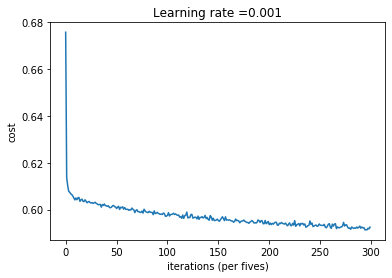

Parameters have been trained!
Train Accuracy: 0.68536586
Test Accuracy: 0.702


In [207]:
parameters = model(X_train, Y_train, X_dev, Y_dev, learning_rate = 0.001,
                   num_epochs = 1500, minibatch_size = 16, print_cost = True)


Cost after epoch 0: 0.658062
Cost after epoch 100: 0.606862
Cost after epoch 200: 0.603987
Cost after epoch 300: 0.601391
Cost after epoch 400: 0.600965
Cost after epoch 500: 0.598245
Cost after epoch 600: 0.596710
Cost after epoch 700: 0.596508
Cost after epoch 800: 0.595989
Cost after epoch 900: 0.594072
Cost after epoch 1000: 0.594094
Cost after epoch 1100: 0.593894
Cost after epoch 1200: 0.594628
Cost after epoch 1300: 0.592919
Cost after epoch 1400: 0.592127


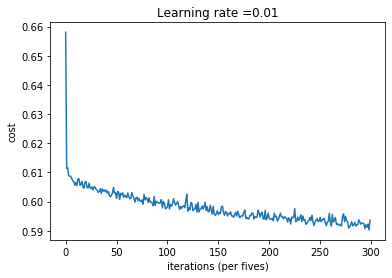

Parameters have been trained!
Train Accuracy: 0.6842572
Test Accuracy: 0.704


In [208]:
parameters2 = model(X_train, Y_train, X_dev, Y_dev, learning_rate = 0.01,
                   num_epochs = 1500, minibatch_size = 32, print_cost = True)


Cost after epoch 0: 0.645475
Cost after epoch 100: 0.604748
Cost after epoch 200: 0.602033
Cost after epoch 300: 0.601830
Cost after epoch 400: 0.599164
Cost after epoch 500: 0.598075
Cost after epoch 600: 0.596901
Cost after epoch 700: 0.595863
Cost after epoch 800: 0.596170
Cost after epoch 900: 0.593809
Cost after epoch 1000: 0.592849
Cost after epoch 1100: 0.595153
Cost after epoch 1200: 0.595753
Cost after epoch 1300: 0.591358
Cost after epoch 1400: 0.590337


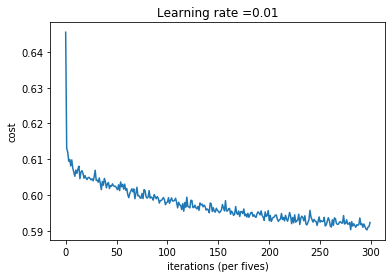

Parameters have been trained!
Train Accuracy: 0.6842572
Test Accuracy: 0.694


In [209]:
parameters3 = model(X_train, Y_train, X_dev, Y_dev, learning_rate = 0.01,
                   num_epochs = 1500, minibatch_size = 16, print_cost = True)



Cost after epoch 0: 0.675804
Cost after epoch 100: 0.603571
Cost after epoch 200: 0.601552
Cost after epoch 300: 0.600065
Cost after epoch 400: 0.598818
Cost after epoch 500: 0.597489
Cost after epoch 600: 0.596408
Cost after epoch 700: 0.595754
Cost after epoch 800: 0.595482
Cost after epoch 900: 0.594089
Cost after epoch 1000: 0.593554
Cost after epoch 1100: 0.594294
Cost after epoch 1200: 0.595134
Cost after epoch 1300: 0.592453
Cost after epoch 1400: 0.591542
Cost after epoch 1500: 0.592101
Cost after epoch 1600: 0.593170
Cost after epoch 1700: 0.591927
Cost after epoch 1800: 0.591069
Cost after epoch 1900: 0.590844
Cost after epoch 2000: 0.590354
Cost after epoch 2100: 0.591042
Cost after epoch 2200: 0.590467
Cost after epoch 2300: 0.590404
Cost after epoch 2400: 0.588239
Cost after epoch 2500: 0.589232
Cost after epoch 2600: 0.588927
Cost after epoch 2700: 0.588439
Cost after epoch 2800: 0.588796
Cost after epoch 2900: 0.589462
Cost after epoch 3000: 0.588061
Cost after epoch 310

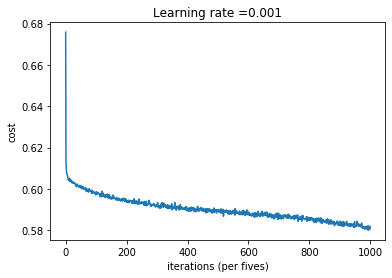

Parameters have been trained!
Train Accuracy: 0.68658537
Test Accuracy: 0.68


In [212]:
parameters4 = model(X_train, Y_train, X_dev, Y_dev, learning_rate = 0.001,
                   num_epochs = 5000, minibatch_size = 16, print_cost = True)

# all results = 1...

In [213]:
tests = np.array([[test[i] for test in testX] for i in range(1648)])

In [215]:
# parameters learning_rate = 0.001, num_epochs = 5000, minibatch_size = 16

test_pred = [predict(np.array(test).reshape((210,1)), parameters4) for test in tests]
result = [predResult[0] for predResult in test_pred]

In [216]:
np.savetxt("nn0.001epochs5000Minibatch16.csv", result, delimiter=",", header = 'result')